In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

DATASET

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


EDA

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [4]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


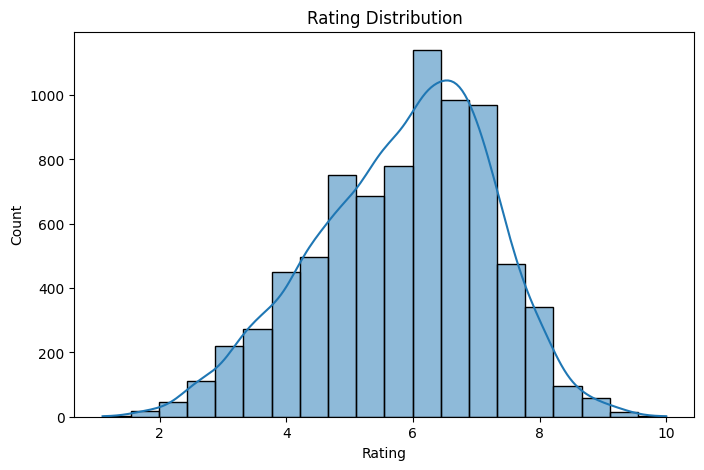

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.show()

In [6]:
df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

,Rating
Genre,
"History, Romance",9.4
"Documentary, Family, History",9.3
"Documentary, Music",8.9
"Documentary, Biography, Music",8.8
"Documentary, Sport",8.6
...,...
"Horror, Musical",NaN
"Horror, Musical, Thriller",NaN
"Horror, Mystery, Sci-Fi",NaN


 Data Preprocessing

In [7]:
# Example Encoding for categorical features
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df['Director'] = label_encoder.fit_transform(df['Director'])
df['Actor 1'] = label_encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = label_encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = label_encoder.fit_transform(df['Actor 3'])

# Fill missing values if any
df.fillna(df.mean(numeric_only=True), inplace=True)

Feature Selection

In [8]:
X = df.drop('Rating', axis=1)
y = df['Rating']

 Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train_numeric = X_train.drop(['Name', 'Year', 'Duration'], axis=1)
X_test_numeric = X_test.drop(['Name', 'Year', 'Duration'], axis=1)

# Convert 'Votes' column to numeric, coercing errors to NaN, and fill NaN
X_train_numeric['Votes'] = pd.to_numeric(X_train_numeric['Votes'].str.replace(',', ''), errors='coerce')
X_test_numeric['Votes'] = pd.to_numeric(X_test_numeric['Votes'].str.replace(',', ''), errors='coerce')

# Fill any remaining NaN values in the numeric dataframes after conversion
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_test_numeric.mean(), inplace=True)


model = LinearRegression()
model.fit(X_train_numeric, y_train)
y_pred = model.predict(X_test_numeric)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.028662131724641826
MSE: 0.9348907201888256


In [11]:
# Sample input prediction
sample_input = X_test.iloc[0]

# Preprocess sample_input to match the training data
sample_input_processed = sample_input.drop(['Name', 'Year', 'Duration'])
sample_input_processed['Votes'] = pd.to_numeric(sample_input_processed['Votes'], errors='coerce')
sample_input_processed.fillna(X_train_numeric.mean(), inplace=True)
predicted_rating = model.predict(sample_input_processed.values.reshape(1, -1))
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.950015030256665


/tmp/ipython-input-11-4141962756.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_input_processed.fillna(X_train_numeric.mean(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
